![header](https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/3ef4c925850873.5634bb924adc1.jpg)

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

**population - The population as of 2015.
population_growth - The annual population growth rate, as a percentage.
area - The total land and water area.**

In this project, we'll use SQL in Jupyter Notebook to explore and analyze data from this database.

In [7]:

%%capture
%load_ext sql


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [5]:
%sql sqlite:///factbook.db 

In [63]:
%%sql

SELECT *
  FROM sqlite_master
 WHERE type='table'; 



 * sqlite:///factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


In [18]:
from sqlalchemy import create_engine
conn = create_engine('sqlite:///factbook.db')

### Data set: 

The dataset is quite simple and will not allow us to answer complicated question. It is composed of 11 colums and 262 row. 

- **id** - id number attribuated to a country.
- **code** - country code, made from the two first letters of the country.
- **area** - total area of the country (area_water + area_land).
- **population** - population of the country 
- **population_growth** - ratio of the population growth in 2015 
- **birth_rate**
- **death_rate**
- **migration_rate** - ratio of people that left the country to another.

It is important to note that the last row (id 262) is not a country but "World" (code: xx). In the end the data is only composed of 261 countries. 


In [6]:
%%sql 
SELECT * 
FROM facts

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46
6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21
7,ar,Argentina,2780400,2736690,43710,43431886,0.93,16.64,7.33,0.0
8,am,Armenia,29743,28203,1540,3056382,0.15,13.61,9.34,5.8
9,as,Australia,7741220,7682300,58920,22751014,1.07,12.15,7.14,5.65
10,au,Austria,83871,82445,1426,8665550,0.55,9.41,9.42,5.56


## What is the maximum and minimum of population and population growth in all the countries?

In [59]:
%%sql
SELECT MIN(population) AS min_pop,
       MAX(population) AS max_pop,
       MIN(population_growth) AS min_pop_growth,
       MAX(population_growth) max_pop_growth 
  FROM facts;

 * sqlite:///factbook.db
Done.


min_pop,max_pop,min_pop_growth,max_pop_growth
0,7256490011,0.0,4.02


In [60]:
%%sql
SELECT *
  FROM facts
 WHERE population == (SELECT MIN(population)
                        FROM facts
                     );

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [47]:
%%sql
SELECT *
  FROM facts
 WHERE population == (SELECT MAX(population)
                        FROM facts
                     );

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


## Finding the outliers

As we saw in our explanation above, the row "World" is the total of the whole database (261 countries). It does appear as the "country" with the max population (7.2 billions) in our query and messes up our analysis. We need to write another query, leaving "World" out of it. Antitartica also appears with 0 population. There are outliers.

In [8]:
%%sql
SELECT MIN(population) AS min_pop,
       MAX(population) AS max_pop,
       MIN(population_growth) AS min_pop_growth,
       MAX(population_growth) AS max_pop_growth 
FROM facts
WHERE name <> 'World'; 

 * sqlite:///factbook.db
Done.


min_pop,max_pop,min_pop_growth,max_pop_growth
0,1367485388,0.0,4.02


Taking "World" out of the equation, we can see that there is a country with 1.4 billion people. 

## Finding Densely Populated Countries¶

To finish, we'll build on the query above to find countries that are densely populated. We'll identify countries that have:

Above average values for population.
Below average values for area.

In [51]:
%%sql
SELECT AVG(population) AS avg_population, AVG(area) AS avg_area
  FROM facts
 WHERE name <> 'World';

 * sqlite:///factbook.db
Done.


avg_population,avg_area
32242666.56846473,555093.546184739


In [53]:
%%sql
SELECT name, population, area
  FROM facts
 WHERE population > (SELECT AVG(population)
                       FROM facts
                    )
   AND area < (SELECT AVG(area)
                 FROM facts
)
    ORDER BY 2 DESC;

 * sqlite:///factbook.db
Done.


name,population,area
Bangladesh,168957745,148460
Japan,126919659,377915
Philippines,100998376,300000
Vietnam,94348835,331210
Germany,80854408,357022
Thailand,67976405,513120
United Kingdom,64088222,243610


In the end, we decided to see the countries where the population density ratio is the more important. To do this, we have made a query that shows the countries with a population that is superior to the average of the column population. In order to detect the "small" countries, we have queried the area to be inferior to the average of the area column. 

As we can now see Bangladesh is the most populated country for a small area. It is then followed by Japan and the Phillipines. 

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

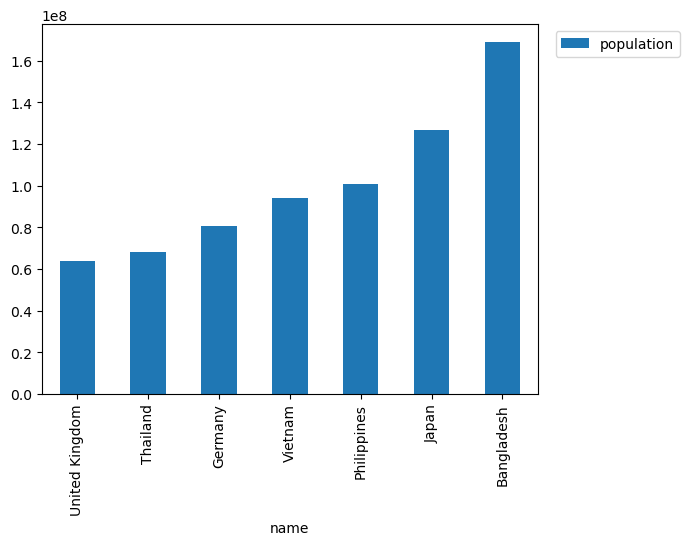

In [40]:
df = pd.read_sql_query("""SELECT name, population, area FROM facts WHERE population > (SELECT AVG(population)FROM facts ) 
AND area < (SELECT AVG(area) FROM facts) ORDER BY 2 DESC;""", con = conn)


population = df[['name','population']].set_index('name')
population.sort_values(by = 'population').plot.bar().legend(bbox_to_anchor = (1.3,1))